In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("vehicles.csv")
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [3]:
df.shape

(426880, 26)

In [4]:
df.isnull().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
dtype: int64

In [5]:
df.pop('VIN')
df.pop('county')
df.pop('size')



0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
426875    NaN
426876    NaN
426877    NaN
426878    NaN
426879    NaN
Name: size, Length: 426880, dtype: object

In [6]:
df.shape

(426880, 23)

In [7]:
df.fillna({'paint_color': df['paint_color'].mode()[0]}, inplace=True)
df.fillna({'type': df['type'].mode()[0]}, inplace=True)
df.fillna({'condition': df['condition'].mode()[0]}, inplace=True)
df.fillna({'description': df['description'].mode()[0]}, inplace=True)
df.fillna({'year': df['year'].mode()[0]}, inplace=True)
df.fillna({'fuel': df['fuel'].mode()[0]}, inplace=True)


In [8]:
df.isnull().sum()


id                   0
url                  0
region               0
region_url           0
price                0
year                 0
manufacturer     17646
model             5277
condition            0
cylinders       177678
fuel                 0
odometer          4400
title_status      8242
transmission      2556
drive           130567
type                 0
paint_color          0
image_url           68
description          0
state                0
lat               6549
long              6549
posting_date        68
dtype: int64

In [9]:
df.dropna(inplace = True)
df.shape

(194371, 23)

In [10]:
df.isnull().sum()


id              0
url             0
region          0
region_url      0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
type            0
paint_color     0
image_url       0
description     0
state           0
lat             0
long            0
posting_date    0
dtype: int64

In [11]:
df.duplicated().sum()


np.int64(0)

In [12]:
display(df.describe())

,id,price,year,odometer,lat,long
count,1.943710e+05,1.943710e+05,194371.000000,1.943710e+05,194371.000000,194371.000000
mean,7.311716e+09,6.246061e+04,2010.456159,1.061238e+05,38.871677,-95.504372
std,4.287168e+06,1.225936e+07,9.101146,1.957716e+05,5.975104,18.775619
min,7.301584e+09,0.000000e+00,1900.000000,0.000000e+00,-81.838232,-159.719900
25%,7.308443e+09,5.600000e+03,2007.000000,5.084950e+04,35.090122,-114.125000
50%,7.312919e+09,1.198800e+04,2013.000000,9.800000e+04,39.610702,-89.642258
75%,7.315306e+09,2.399900e+04,2016.000000,1.425060e+05,42.677719,-81.028160
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07,82.252826,173.885502


In [13]:
df = df[(df['price'] >= 10000) & (df['price'] <= 1000000)]
df = df[(df['year'] >= 1970) & (df['year'] <= 2022)]
df = df[(df['odometer'] >= 0) & (df['odometer'] <= 10000)]

display(df.describe())

,id,price,year,odometer,lat,long
count,5.977000e+03,5977.000000,5977.000000,5977.000000,5977.000000,5977.000000
mean,7.311534e+09,38585.886565,2016.590430,4729.169818,38.776629,-96.187111
std,4.380267e+06,24116.174482,8.526215,3405.368994,7.286010,20.362266
min,7.301591e+09,10000.000000,1970.000000,0.000000,-67.144243,-159.590001
25%,7.308261e+09,26695.000000,2017.000000,1419.000000,33.875577,-112.420000
50%,7.312767e+09,36773.000000,2019.000000,4899.000000,39.170000,-87.865800
75%,7.315285e+09,41990.000000,2020.000000,7933.000000,42.562000,-81.540000
max,7.317093e+09,990000.000000,2022.000000,10000.000000,64.993698,173.885502


In [14]:
df.shape

(5977, 23)

1-What is the most selling manfacturer ?

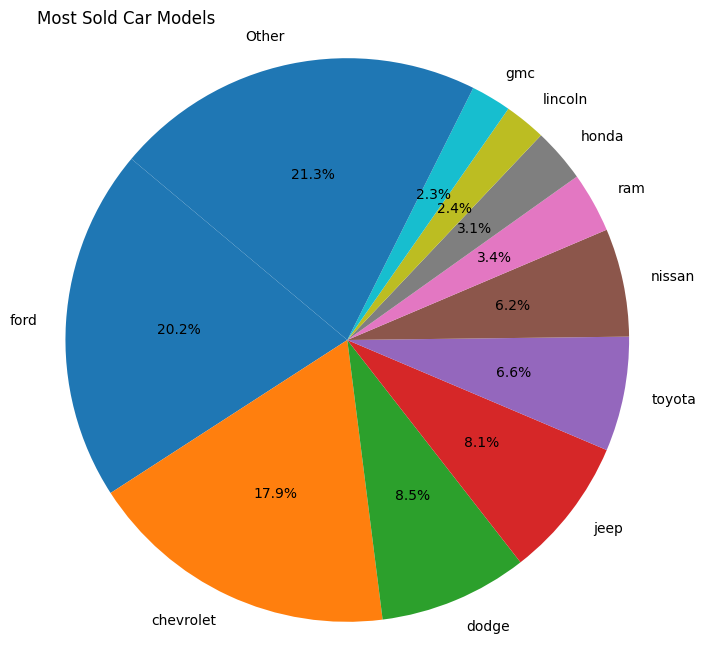

In [15]:
model_counts = df['manufacturer'].value_counts()
top_models = model_counts.head(10)
other_count = model_counts.iloc[10:].sum()
top_models['Other'] = other_count

plt.figure(figsize=(8, 8))
plt.pie(top_models, labels=top_models.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab10.colors)
plt.title('Most Sold Car Models',loc='left' )
plt.axis('equal')  

plt.show()


2-What is the most sold cars in specific condition ?

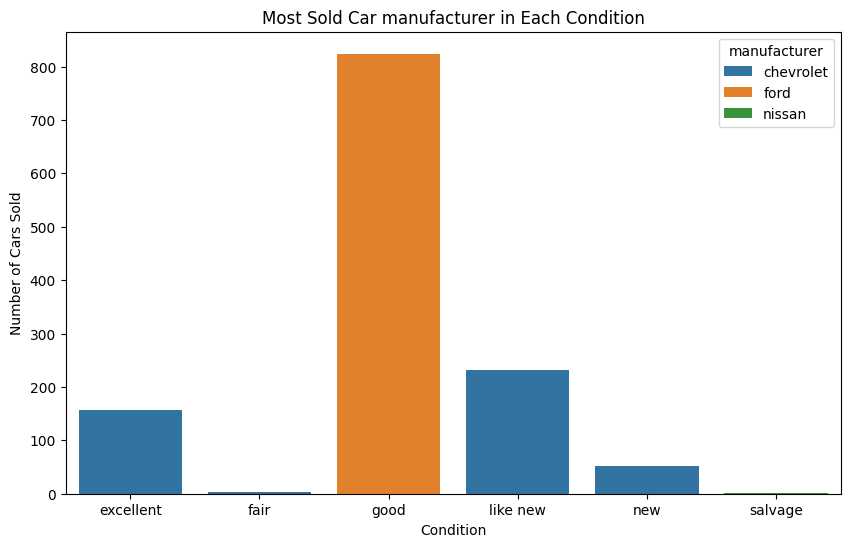

In [16]:
grouped_data = df.groupby(['condition', 'manufacturer']).size().reset_index(name='count')

most_sold_condition = grouped_data.loc[grouped_data.groupby('condition')['count'].idxmax()]

plt.figure(figsize=(10, 6))
sns.barplot(data=most_sold_condition, x='condition', y='count', hue='manufacturer')
plt.title('Most Sold Car manufacturer in Each Condition')
plt.xlabel('Condition')
plt.ylabel('Number of Cars Sold')
plt.legend(title='manufacturer')
plt.show()

3-What is the effect of the car condition on the price ?

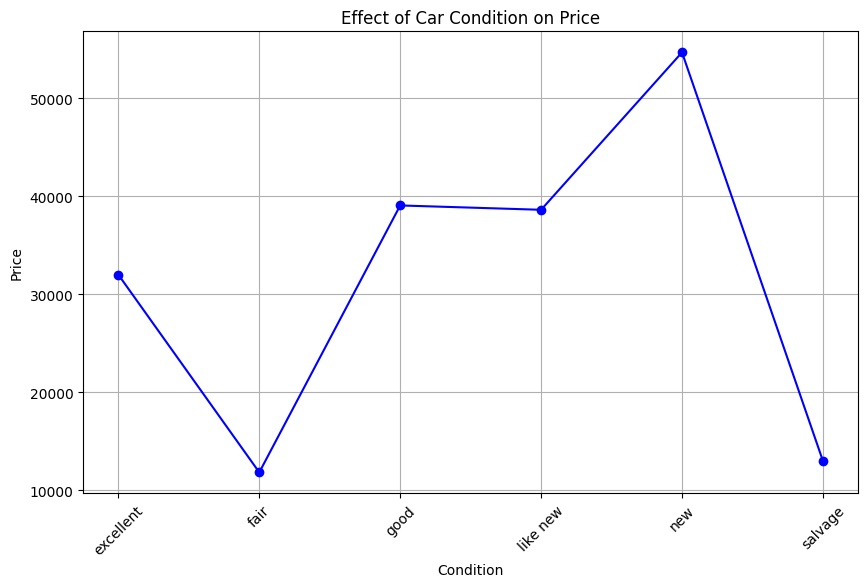

In [19]:
conditin_price = df.groupby('condition')['price'].mean().reset_index()

conditin_price.sort_values(by='condition', inplace=True)

plt.figure(figsize=(10, 6))
plt.plot(conditin_price['condition'], conditin_price['price'], marker='o', linestyle='-', color='b')
plt.title('Effect of Car Condition on Price')
plt.xlabel('Condition')
plt.ylabel('Price')
plt.grid(True)
plt.xticks(rotation=45)  
plt.show()

4-What is the paint color effect on price?

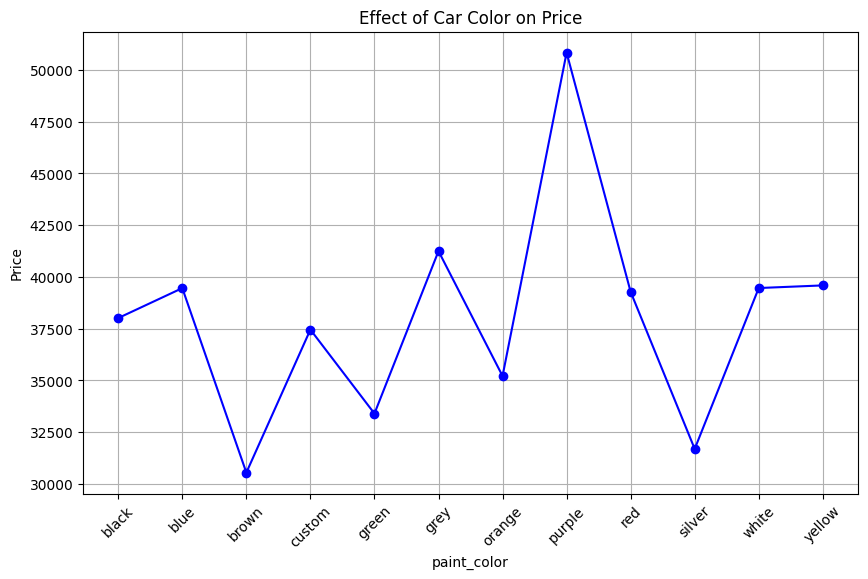

In [20]:
color_price = df.groupby('paint_color')['price'].mean().reset_index()

color_price.sort_values(by='paint_color', inplace=True)

plt.figure(figsize=(10, 6))
plt.plot(color_price['paint_color'], color_price['price'], marker='o', linestyle='-', color='b')
plt.title('Effect of Car Color on Price')
plt.xlabel('paint_color')
plt.ylabel('Price')
plt.grid(True)
plt.xticks(rotation=45)  
plt.show()

5-What is the car price by cylinders?

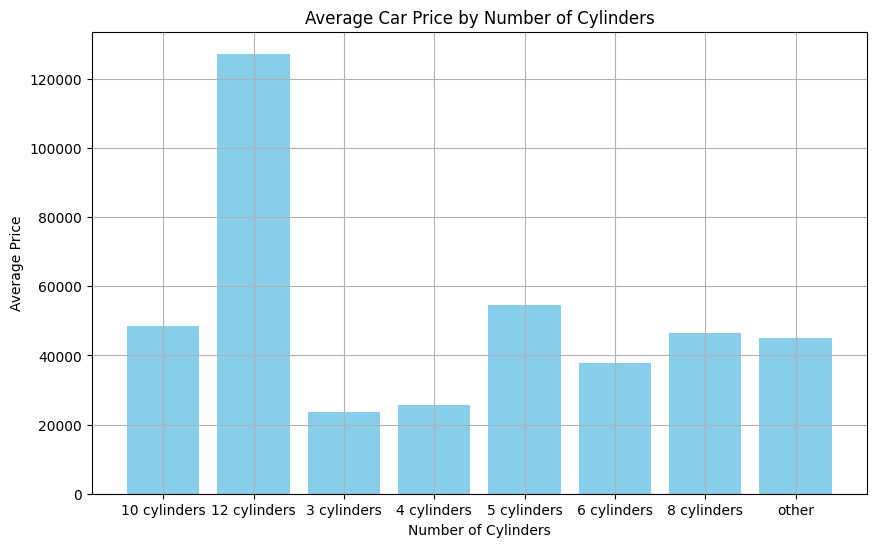

In [21]:

cylinders_avg_price = df.groupby('cylinders')['price'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(cylinders_avg_price['cylinders'], cylinders_avg_price['price'], color='skyblue')

plt.title('Average Car Price by Number of Cylinders')
plt.xlabel('Number of Cylinders')
plt.ylabel('Average Price')

plt.grid(True)
plt.show()

6- what is the price based on region and condition?

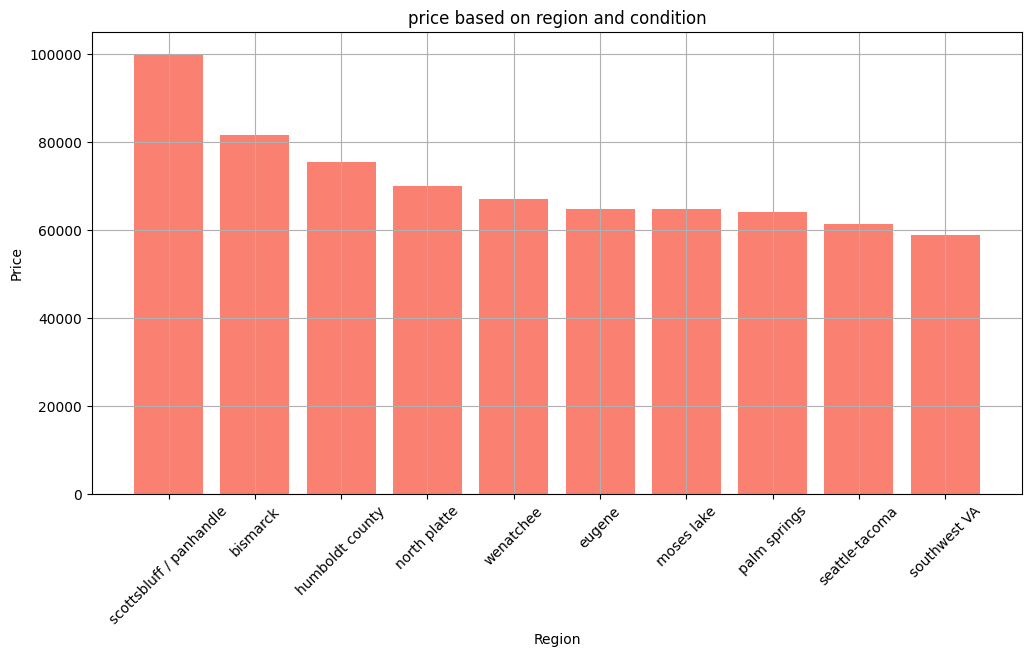

In [22]:
region_avg_price = df.groupby('region')['price'].mean().reset_index()

top_10_regions = region_avg_price.sort_values(by='price', ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.bar(top_10_regions['region'], top_10_regions['price'], color='salmon')

plt.title('price based on region and condition')
plt.xlabel('Region')
plt.ylabel('Price')

plt.xticks(rotation=45)
plt.grid(True)
plt.show()